In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import pizzeria csv
pizzerias = pd.read_csv("../Data/pizzerias - Pizza.csv")

# extract lat and long from location
pizzerias["lat"] = pizzerias["Location"].apply(lambda x: float(x.split(",")[0]))
pizzerias["long"] = pizzerias["Location"].apply(lambda x: float(x.split(",")[1]))

# convert to geodataframe
pizzerias_gdf = gpd.GeoDataFrame(pizzerias, geometry=gpd.points_from_xy(pizzerias.long, pizzerias.lat))

# sort by rating and Pizzeria
pizzerias_gdf = pizzerias_gdf.sort_values(by=["Rating", "Pizzeria"], ascending=[False, True])
# set column order
pizzerias_gdf = pizzerias_gdf[["Pizzeria", "Style", "State", "Rating", "Notes", "Image", "geometry"]]
# replace nan with empty string
pizzerias_gdf = pizzerias_gdf.fillna("")

/var/folders/q9/4c9l_trn4471nk6lfbvtpn400000gn/T/ipykernel_74397/1166036906.py:16: DeprecationWarning: ExtensionArray.fillna added a 'copy' keyword in pandas 2.1.0. In a future version, ExtensionArray subclasses will need to implement this keyword or an exception will be raised. In the interim, the keyword is ignored by GeometryArray.
  pizzerias_gdf = pizzerias_gdf.fillna("")


In [5]:
# export as geojson
pizzerias_gdf.to_file("../Data/pizzerias.geojson", driver="GeoJSON")

In [9]:
# calculate average Rating and count by State
pizzerias_state = pizzerias[["State", "Rating"]].groupby("State").agg(["mean", "count"]).reset_index()
# flatten columns
pizzerias_state.columns = pizzerias_state.columns.droplevel(0)
pizzerias_state.columns = ["State", "Average Rating", "Number of Ratings"]
# keep if count is greater than 5
# pizzerias_state = pizzerias_state[pizzerias_state["Number of Ratings"] >= 5]
# sort by average rating
pizzerias_state = pizzerias_state.sort_values(by="Number of Ratings", ascending=False)

In [10]:
pizzerias_state

,State,Average Rating,Number of Ratings
8,MA,2.964286,84
3,DC,3.539683,63
13,NY,3.921053,38
16,VA,3.500000,24
7,Italy,3.900000,10
12,NH,2.750000,8
4,FL,3.333333,6
15,Slovenia,4.000000,6
14,PA,3.666667,6
0,CA,3.400000,5


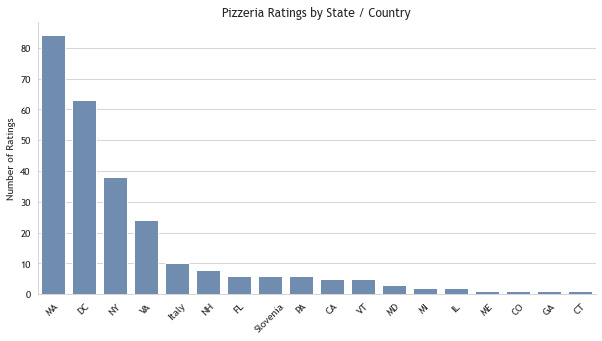

In [32]:
# plot count of ratings by state
sns.set_style("whitegrid")

# set font to Trebuchet MS
plt.rcParams['font.sans-serif'] = "Trebuchet MS"
# create plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=pizzerias_state, x="State", y="Number of Ratings", color='xkcd:faded blue')
# set title
plt.title("Pizzeria Ratings by State / Country")
# remove x-axis label
plt.xlabel("")
# # set y-axis label
plt.ylabel("Number of Ratings")
# rotate x-axis labels
plt.xticks(rotation=45)
# remove top and right spines
sns.despine()
# save plot
plt.savefig("../images/pizzeria_counts.png", bbox_inches="tight", dpi=300)
# show plot
plt.show()

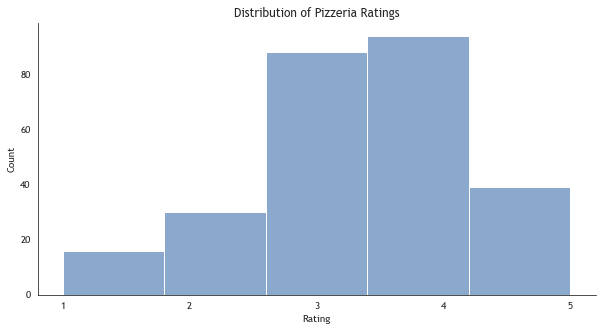

In [30]:
# histogram of ratings
sns.set_style("white")

# set font to Trebuchet MS
plt.rcParams['font.sans-serif'] = "Trebuchet MS"

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=pizzerias, x="Rating", bins=5, color='xkcd:faded blue')
# set title
plt.title("Distribution of Pizzeria Ratings")
# set x-axis label
plt.xlabel("Rating")
# only show integer values on x-axis
plt.locator_params(axis="x", integer=True)
# set y-axis label
plt.ylabel("Count")
# remove top and right spines
sns.despine()
# save plot
plt.savefig("../images/pizzeria_ratings.png", bbox_inches="tight", dpi=300)
# show plot
plt.show()